In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline


In [2]:
df = pd.read_csv('../data/raw/raw.csv')
df

,image_path,label,target,Imagenes
0,non_autistic\0966.jpg,non_autistic,1,[[[0.5254902 0.7254902 0.70980392]\n [0.525...
1,non_autistic\1441.jpg,non_autistic,1,[[[0.46666667 0.4627451 0.42352941]\n [0.470...
2,non_autistic\0852.jpg,non_autistic,1,[[[0.30980392 0.37254902 0.42352941]\n [0.309...
3,autistic\0994.jpg,autistic,0,[[[0.92156863 0.78823529 0.69803922]\n [0.898...
4,non_autistic\0022.jpg,non_autistic,1,[[[0.32156863 0.36862745 0.41568627]\n [0.184...
...,...,...,...,...
2931,autistic\1426.jpg,autistic,0,[[[0.36470588 0.50980392 0.50196078]\n [0.360...
2932,non_autistic\0657.jpg,non_autistic,1,[[[0.99607843 0.99215686 0.97647059]\n [0.996...
2933,autistic\0081.jpg,autistic,0,[[[0.26666667 0.29411765 0.30588235]\n [0.270...
2934,non_autistic\0345.jpg,non_autistic,1,[[[0.96470588 0.89803922 0.49411765]\n [0.960...


In [3]:
def prepare_dataframe(df):
    """
    Esta función procesa un DataFrame agregando una columna 'target' mapeada de la columna 'label',
    procesa las imágenes de las rutas dadas en 'image_path' y reorganiza el DataFrame.

    Args:
        df (pd.DataFrame): DataFrame original con columnas 'image_path' y 'label'.

    Returns:
        pd.DataFrame: DataFrame procesado con columnas adicionales 'target' e 'Imagenes'.
    """
    # Mapeo de etiquetas a valores numéricos
    target_map = {'autistic': 0, 'non_autistic': 1}
    df['target'] = df['label'].map(target_map)

    # Función para leer y escalar imágenes
    def procesar_imagen(path):
        img = cv2.imread(path, 0)
        img_scale = np.array(img) / 255.0
        return img_scale

    # Aplicar la función de procesamiento de imágenes
    df['Imagenes'] = df['image_path'].apply(procesar_imagen)

    # Mezclar y reiniciar índice del DataFrame
    df = df.sample(frac=1).reset_index(drop=True)

    return df

In [4]:
prepare_dataframe(df)

,image_path,label,target,Imagenes
0,autistic\1205.jpg,autistic,0,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
1,autistic\0290.jpg,autistic,0,"[[0.6470588235294118, 0.6549019607843137, 0.66..."
2,autistic\0197.jpg,autistic,0,"[[0.30980392156862746, 0.3137254901960784, 0.3..."
3,non_autistic\1450.jpg,non_autistic,1,"[[0.38823529411764707, 0.29411764705882354, 0...."
4,non_autistic\0665.jpg,non_autistic,1,"[[0.01568627450980392, 0.0196078431372549, 0.0..."
...,...,...,...,...
2931,non_autistic\1259.jpg,non_autistic,1,"[[0.4235294117647059, 0.4117647058823529, 0.38..."
2932,non_autistic\0646.jpg,non_autistic,1,"[[0.1843137254901961, 0.2, 0.21568627450980393..."
2933,non_autistic\0498.jpg,non_autistic,1,"[[0.2980392156862745, 0.30196078431372547, 0.3..."
2934,autistic\0436.jpg,autistic,0,"[[0.3607843137254902, 0.3568627450980392, 0.36..."


In [5]:
# Aplanar las imágenes
X = np.array([img.flatten() for img in df['Imagenes']])
y = df['target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)


(2348, 50176)
(588, 50176)
(2348,)
(588,)


In [8]:
# Entrenar un modelo de clasificación
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5918367346938775


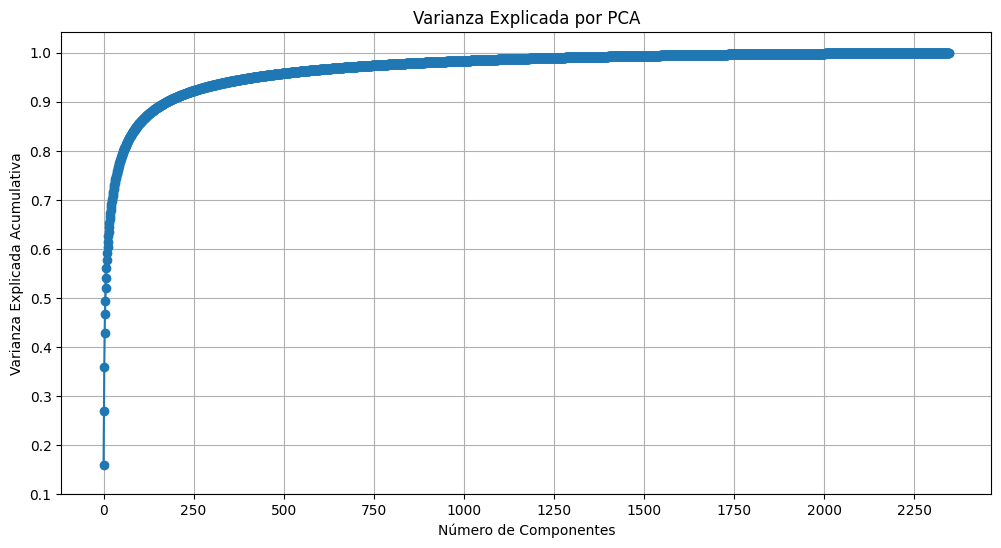

In [9]:
pca = PCA()
pca.fit(X_train)  

# Calcular la varianza explicada acumulativa
varianza_acumulada = pca.explained_variance_ratio_.cumsum()

# Graficar la varianza explicada acumulativa
plt.figure(figsize=(12,6))
plt.plot(varianza_acumulada, marker='o')
plt.xlabel('Número de Componentes')
plt.xticks(range(0, len(varianza_acumulada), 250), range(0, len(varianza_acumulada), 250))
plt.ylabel('Varianza Explicada Acumulativa')
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.title('Varianza Explicada por PCA')
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [10]:
pca2 = PCA(n_components=250)  # Conservo apróximadamente el 92% de varianza

X_train_pca = pca2.fit_transform(X_train)
X_test_pca = pca2.transform(X_test)

In [11]:
print (X_train_pca.shape)
print (X_test_pca.shape)


(2348, 250)
(588, 250)


In [12]:
df_pca = pd.DataFrame(X_train_pca)
df_pca.columns = ['PC' + str(i+1) for i in range(df_pca.shape[1])]
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC241,PC242,PC243,PC244,PC245,PC246,PC247,PC248,PC249,PC250
0,-17.627780,-2.617298,17.004345,9.931651,-2.759624,0.892808,-4.902785,-2.742886,-4.643769,-4.349904,...,-0.189388,-1.118818,-0.212400,-0.448478,0.060911,-0.525496,0.632729,0.308341,0.432176,-0.219013
1,16.640005,-20.950751,-9.797362,-12.932181,-13.394300,-6.292713,0.419905,0.178878,6.635334,3.067554,...,-0.686433,0.248499,0.251280,0.799790,0.975899,0.735505,-0.946180,0.133294,1.061417,0.731034
2,-27.734310,36.294340,3.132797,-2.576969,-8.724740,5.383812,7.218112,-3.147271,-3.523406,3.715300,...,0.564231,0.258906,1.132904,0.513753,-0.148109,-0.114090,-0.115160,-0.394641,-0.078753,-0.140779
3,-11.787191,-1.701846,5.538323,-16.553568,12.786175,-5.579407,-0.811657,-3.599532,-5.107241,-6.332853,...,0.428727,0.258748,0.312461,0.760081,-0.341511,-0.266293,0.301629,-0.469877,0.359189,0.068601
4,-35.087639,32.143783,25.059786,8.122073,7.326460,10.271401,3.256477,-5.656741,4.712522,-9.110174,...,0.151752,-0.046625,-0.295983,0.497963,0.747203,0.180751,1.055739,0.744197,0.288667,-1.106134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,29.248611,9.730560,-7.320365,-11.725434,-23.642527,-4.804386,-13.782193,-9.017527,-9.084834,7.496434,...,0.410103,0.730436,0.538736,-1.296054,-0.575697,1.926464,0.507916,0.306641,0.049113,-0.257621
2344,9.031075,-14.439320,4.798570,15.773383,-12.757754,-3.961639,21.473375,-6.578412,7.484448,15.944588,...,0.365465,-0.007649,0.177913,1.370904,1.215285,-0.177069,-0.049709,1.217382,-0.587141,0.944456
2345,4.146159,7.416100,-14.219994,-22.030043,2.574484,-3.860368,-5.415539,6.216829,-0.963016,-1.817768,...,0.120110,-0.095743,-0.442043,-0.301849,0.530357,0.072920,0.111445,0.653153,-0.646303,0.329944
2346,-11.429527,0.414659,11.418988,-7.771413,3.084453,1.479132,-11.795041,-11.719369,-2.621146,3.755887,...,0.519050,0.369045,0.517184,-0.219216,0.185421,0.406306,0.299070,0.796919,1.018633,0.359554


In [13]:
df_pca.to_csv('df_pca.csv', index=False)

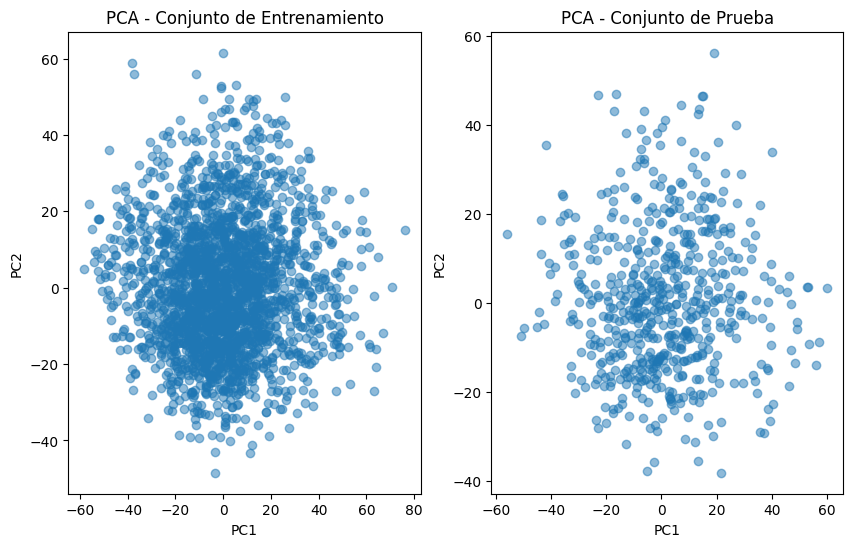

In [14]:
plt.figure(figsize=(10, 6))

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.5)
plt.title('PCA - Conjunto de Entrenamiento')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Conjunto de prueba
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], alpha=0.5)
plt.title('PCA - Conjunto de Prueba')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show();

In [15]:
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6377551020408163


In [16]:
model_params = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'classifier__C': [0.1, 1, 10]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1],
            'classifier__max_depth': [3, 5, 7]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [10, 20],
            'classifier__min_samples_split': [2, 5, 10]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance']
        }
    },
    'MLPClassifier': {
        'model': MLPClassifier(max_iter=1000),
        'params': {
            'classifier__hidden_layer_sizes': [(50,), (100,)],
            'classifier__activation': ['relu'],
            'classifier__alpha': [0.001, 0.01]
        }
    }
}

In [17]:

# Iterar a través de cada modelo, aplicar RandomizedSearchCV y mostrar resultados y mejores parámetros
for model_name, mp in model_params.items():
    pipeline = Pipeline([
        ('classifier', mp['model'])
    ])

    
    random_search = RandomizedSearchCV(pipeline, mp['params'], cv=5, n_iter=10, scoring='accuracy', random_state=42, verbose=3, n_jobs=-1)
    random_search.fit(X_train_pca, y_train)

    print(f"Mejores parámetros para {model_name}: {random_search.best_params_}")
    print(f"Mejor precisión para {model_name}: {random_search.best_score_}")


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Mejores parámetros para LogisticRegression: {'classifier__C': 0.1}
Mejor precisión para LogisticRegression: 0.6482103162001541
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores parámetros para GradientBoosting: {'classifier__n_estimators': 100, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.1}
Mejor precisión para GradientBoosting: 0.6861271151839586
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores parámetros para RandomForest: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 5, 'classifier__max_depth': 20}
Mejor precisión para RandomForest: 0.6797287120627864
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Mejores parámetros para KNN: {'classifier__weights': 'distance', 'classifier__n_neighbors': 3}
Mejor precisión para KNN: 0.6452397586535408
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Mejores parámetros para MLPClassifier: {'cla

In [18]:
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test_pca)

In [19]:
best_model

Pipeline(steps=[('classifier',
                 MLPClassifier(alpha=0.001, hidden_layer_sizes=(50,),
                               max_iter=1000))])

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report

# Hacer predicciones en el conjunto de prueba y entrenamiento

y_test_pred = best_model.predict(X_test_pca)
y_train_pred = best_model.predict(X_train_pca)

# Calcular y mostrar la precisión para ambos conjuntos

acuraccy_test = accuracy_score(y_test, y_test_pred)
print("Precisión del modelo en el conjunto de prueba:\n", acuraccy_test)

acuraccy_train = accuracy_score(y_train, y_train_pred)
print("Precisión del modelo en el conjunto de entrenamiento:\n", acuraccy_train)


Precisión del modelo en el conjunto de prueba:
 0.6615646258503401
Precisión del modelo en el conjunto de entrenamiento:
 1.0


In [21]:
# Mostrar el reporte de clasificación para el conjunto de prueba
print("\nReporte de Clasificación (Test):\n", classification_report(y_test, y_test_pred))

# Mostrar el reporte de clasificación para el conjunto de entrenamiento
print("\nReporte de Clasificación (Train):\n", classification_report(y_train, y_train_pred))



Reporte de Clasificación (Test):
               precision    recall  f1-score   support

           0       0.69      0.65      0.67       309
           1       0.63      0.68      0.66       279

    accuracy                           0.66       588
   macro avg       0.66      0.66      0.66       588
weighted avg       0.66      0.66      0.66       588


Reporte de Clasificación (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1159
           1       1.00      1.00      1.00      1189

    accuracy                           1.00      2348
   macro avg       1.00      1.00      1.00      2348
weighted avg       1.00      1.00      1.00      2348



In [22]:
# Mostrar la matriz de confusión para el conjunto de prueba

print("\nMatriz de Confusión (Test):\n", confusion_matrix(y_test, y_test_pred))

# Mostrar la matriz de confusión para el conjunto de entrenamiento

print("\nMatriz de Confusión (Train):\n", confusion_matrix(y_train, y_train_pred))


Matriz de Confusión (Test):
 [[200 109]
 [ 90 189]]

Matriz de Confusión (Train):
 [[1159    0]
 [   0 1189]]


In [23]:
roc_auc = roc_auc_score(y_test, y_test_pred)

print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.6623342728886106


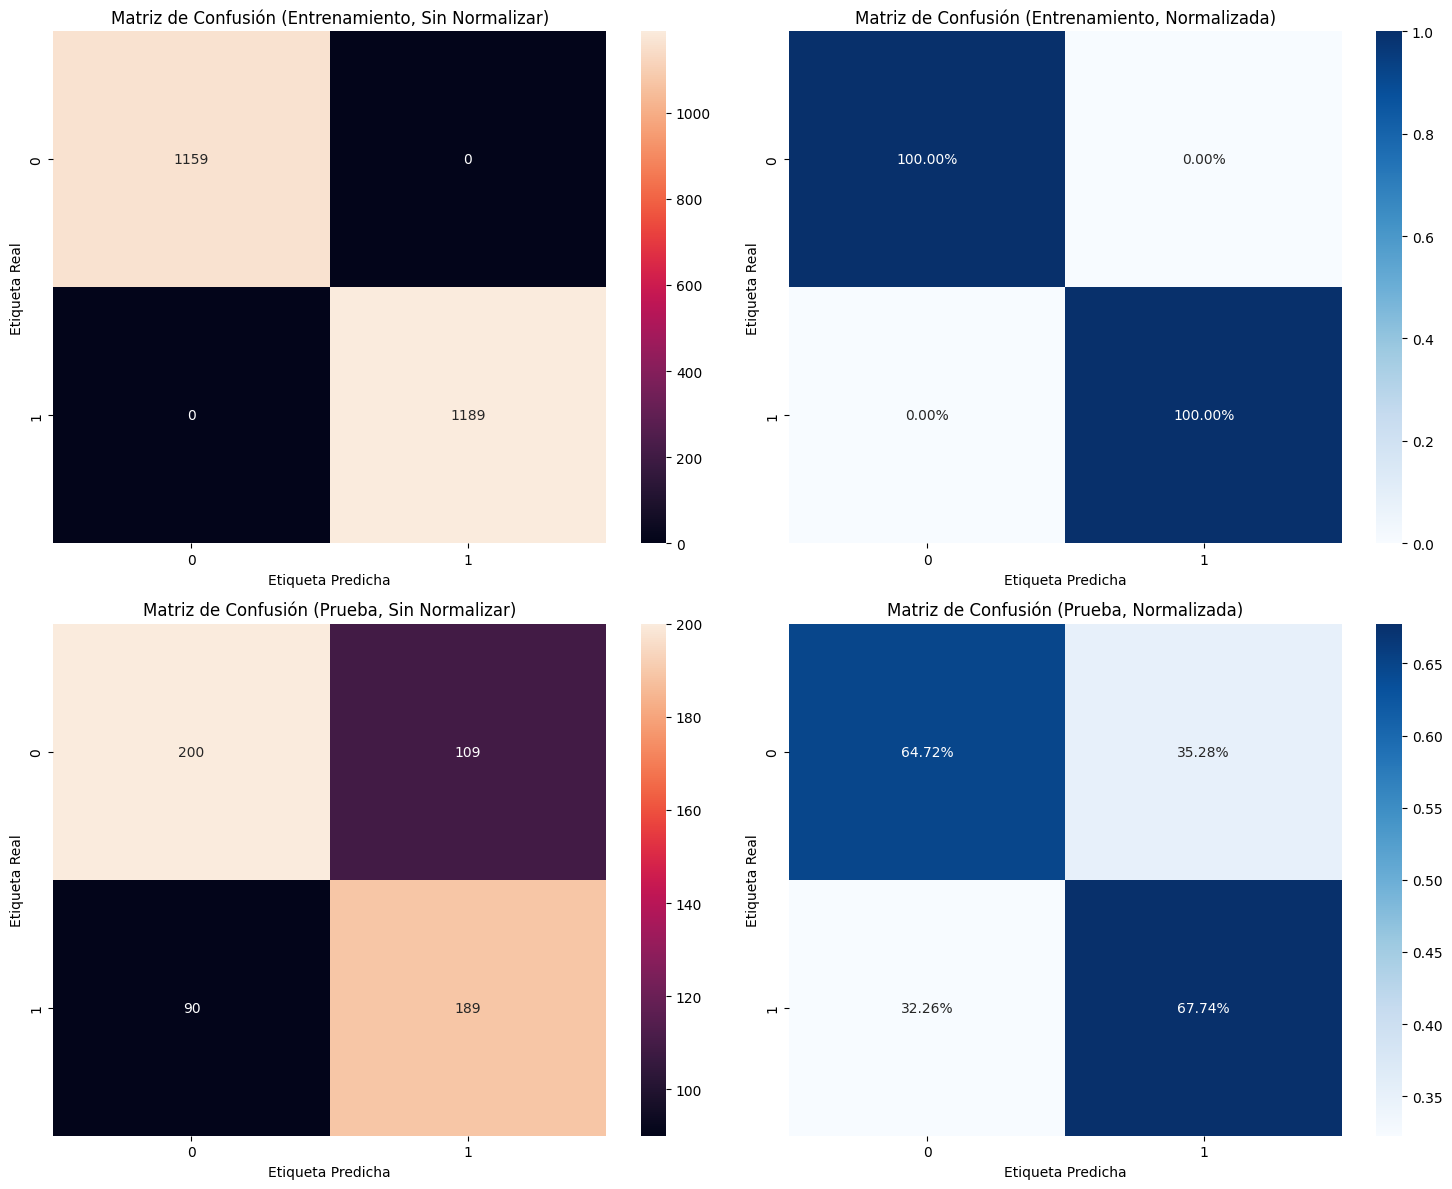

In [31]:
# Configurar subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Matriz de confusión para el conjunto de entrenamiento (sin normalizar)
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', ax=ax[0, 0])
ax[0, 0].set_title('Matriz de Confusión (Entrenamiento, Sin Normalizar)')
ax[0, 0].set_ylabel('Etiqueta Real')
ax[0, 0].set_xlabel('Etiqueta Predicha')

# Matriz de confusión para el conjunto de entrenamiento (normalizada)
sns.heatmap(confusion_matrix(y_train, y_train_pred, normalize='true'), annot=True, fmt='.2%', ax=ax[0, 1], cmap='Blues')
ax[0, 1].set_title('Matriz de Confusión (Entrenamiento, Normalizada)')
ax[0, 1].set_ylabel('Etiqueta Real')
ax[0, 1].set_xlabel('Etiqueta Predicha')

# Matriz de confusión para el conjunto de prueba (sin normalizar)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', ax=ax[1, 0])
ax[1, 0].set_title('Matriz de Confusión (Prueba, Sin Normalizar)')
ax[1, 0].set_ylabel('Etiqueta Real')
ax[1, 0].set_xlabel('Etiqueta Predicha')

# Matriz de confusión para el conjunto de prueba (normalizada)
sns.heatmap(confusion_matrix(y_test, y_test_pred, normalize='true'), annot=True, fmt='.2%', ax=ax[1, 1], cmap='Blues')
ax[1, 1].set_title('Matriz de Confusión (Prueba, Normalizada)')
ax[1, 1].set_ylabel('Etiqueta Real')
ax[1, 1].set_xlabel('Etiqueta Predicha')

plt.tight_layout()
plt.show()

In [25]:
rf_model = RandomForestClassifier(n_estimators=200, min_samples_split=2, max_depth=10, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train_pca, y_train)

# Evaluar el modelo
train_accuracy = rf_model.score(X_train_pca, y_train)
test_accuracy = rf_model.score(X_test_pca, y_test)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.9931856899488927
Test Accuracy: 0.7040816326530612


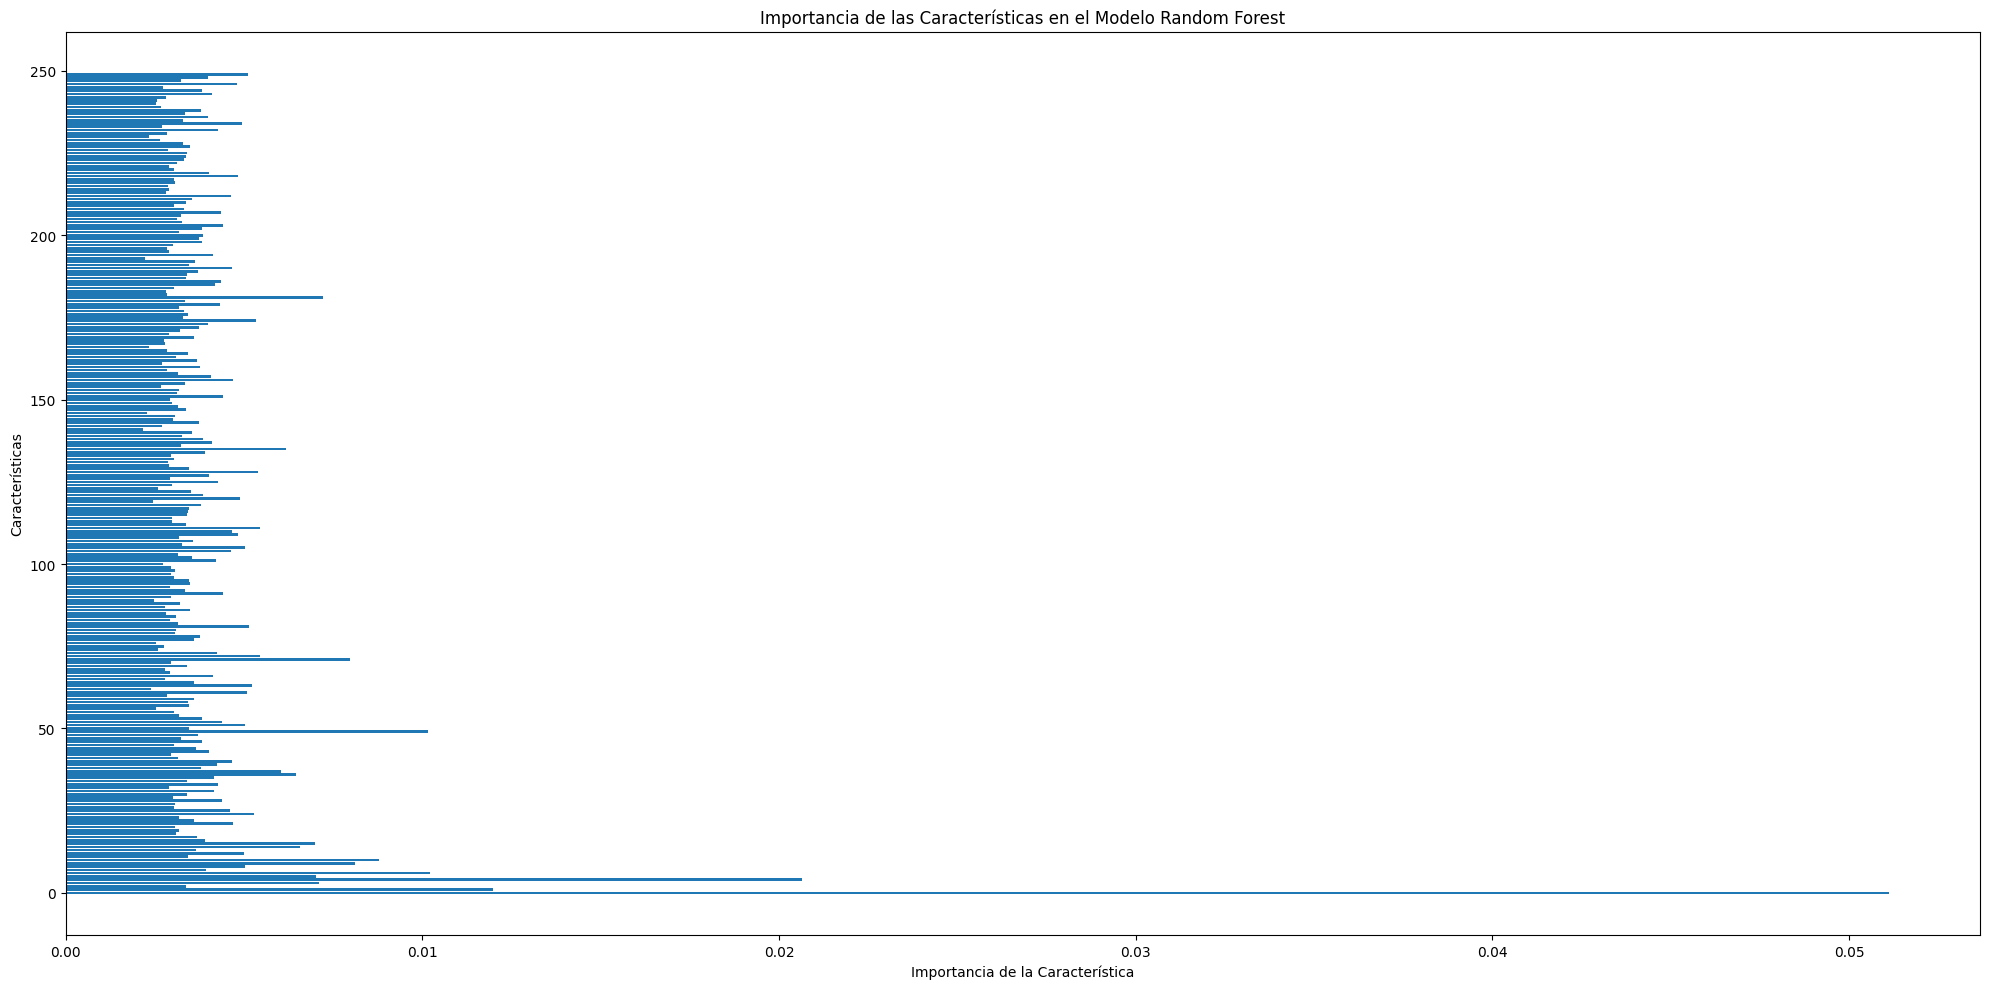

In [26]:
feature_importances = rf_model.feature_importances_


feature_names = df_pca.columns

# Crear un gráfico de barras para las importancias de las características
plt.figure(figsize=(20, 10))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.xlabel('Importancia de la Característica')
plt.ylabel('Características')
plt.title('Importancia de las Características en el Modelo Random Forest')
plt.tight_layout()
plt.show()

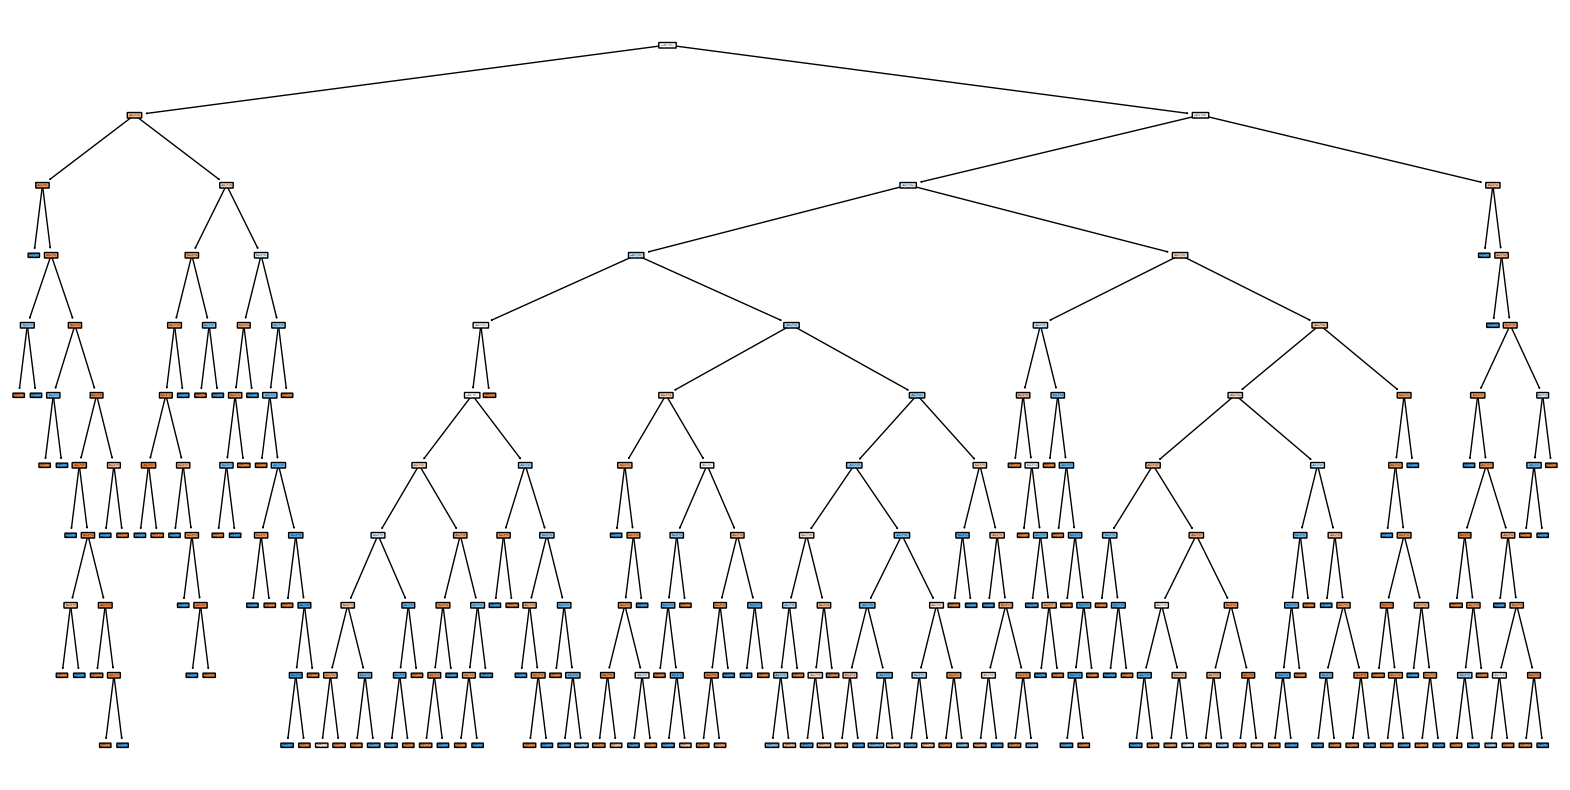

In [27]:
from sklearn.tree import plot_tree

chosen_tree = rf_model.estimators_[0]

# Graficamos el árbol
plt.figure(figsize=(20,10))
plot_tree(chosen_tree, filled=True, feature_names=feature_names, rounded=True)
plt.show()

In [28]:
import pickle

with open('sklearn_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)